In [1]:
import mylib.ICA as ica
import mylib.IO as io
import matplotlib.pyplot as plt
import scipy.io.wavfile as spwav
import numpy as np
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# load the data from files
sound = spwav.read('report2_all/report2_kadai4_data1/HeyJude.wav')
sound

(44100, array([[   0,    0],
        [   0,    0],
        [   0,    0],
        ..., 
        [ 676, 5167],
        [ 697, 4898],
        [ 638, 4580]], dtype=int16))

In [3]:
# use a part of music in order to reduce the calculation time
part = 300000

# make a matrix dataX
dataX = np.array([sound[1][:part,0], sound[1][:part,1]])
fullX = np.array([sound[1][:,0], sound[1][:,1]])

#linear conversion of every dataX[i] so that E[dataX[i]] = 0
dataX, meanarr = ica.make_mean_0(dataX)
fullX, meanarr = ica.make_mean_0(fullX)
print(len(dataX[0]),len(dataX[1]))

300000 300000


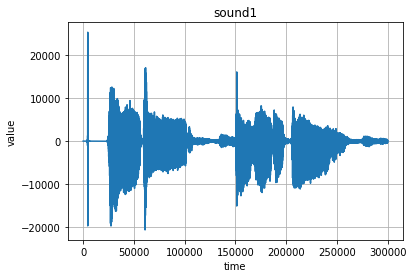

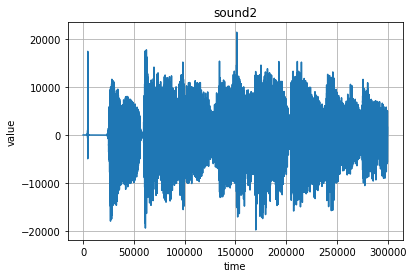

In [4]:
# show sound1
io.plot_graph(dataX[0], 'sound1', 'time')
plt.show()

# show sound2
io.plot_graph(dataX[1], 'sound2', 'time')
plt.show()

In [5]:
# whiten dataX
dataZ = ica.whitening_data(dataX)
fullZ = ica.whitening_data(fullX)

# calculate a matrix W
mat_W = ica.make_W(dataZ, 2)

In [6]:
# calculate two source signals
source = ica.find_source(mat_W, fullZ)

# standardize each source
source = io.standardize_wav(source)

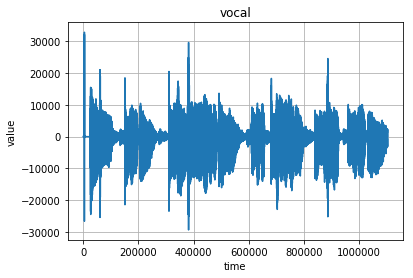

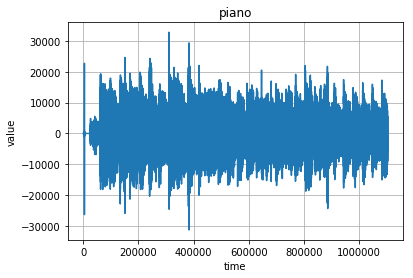

In [7]:
# show source1
io.plot_graph(source[0], 'vocal', 'time')
plt.show()

# show source2
io.plot_graph(source[1], 'piano', 'time')
plt.show()

In [8]:
# write each source to a wavfile
spwav.write('separated_source/kadai4/vocal.wav', 44100, source[0])
spwav.write('separated_source/kadai4/piano.wav', 44100, source[1])